kosis.kr: 소방청->시도별화재발생현황(총괄) 2010~2021
* 시각화 기획, 설계, 구현
* 지자체별 화재 건수

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc

current_font_list = matplotlib.rcParams['font.family']

font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)
matplotlib.rcParams['font.family'] = [font]+current_font_list
print(matplotlib.rcParams['font.family'])

['HYGothic-Extra', 'sans-serif']


In [2]:
pd_data = pd.read_csv('시도별_화재발생_현황_총괄__20230307153228.csv', encoding='cp949')
filter1 = pd_data['행정구역별'] != '전국'
pd_data = pd_data[filter1]
pd_data = pd_data.reset_index()
pd_data = pd_data.drop(['index'], axis=1)

pd_data['행정구역별'].value_counts()
# pd_data
# pd_data.iloc[94]['시점'] = '2010'
# pd_data.iloc[83]

서울특별시      12
강원도        12
경상남도       12
경상북도       12
전라남도       12
전라북도       12
충청남도       12
충청북도       12
경기도        12
부산광역시      12
울산광역시      12
대전광역시      12
광주광역시      12
인천광역시      12
대구광역시      12
제주특별자치도    12
세종특별자치시    10
Name: 행정구역별, dtype: int64

In [3]:
pd_data[pd_data['행정구역별'] == '세종특별자치시']
for i in range(84,86):
    if(i == 84):
        new_data = {
        '행정구역별' : '세종특별자치시',
        '시점' : 2010,
        '건수 (건)':0, '사망 (명)':0, '부상 (명)':0, '재산피해(계) (천원)':0, '부동산 (천원)':0, '동산 (천원)':0, '이재가구수 (가구)':0, '이재민수 (명)': 0
        }
    if(i == 85):
        new_data = {
        '행정구역별' : '세종특별자치시',
        '시점' : 2011,
        '건수 (건)':0, '사망 (명)':0, '부상 (명)':0, '재산피해(계) (천원)':0, '부동산 (천원)':0, '동산 (천원)':0, '이재가구수 (가구)':0, '이재민수 (명)': 0
        }
    temp1 = pd_data[pd_data.index < i]
    temp2 = pd_data[pd_data.index >= i]
    pd_data = temp1.append(new_data,ignore_index=True).append(temp2, ignore_index=True)

C:\Users\ITPS\AppData\Local\Temp\ipykernel_11172\4044854760.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd_data = temp1.append(new_data,ignore_index=True).append(temp2, ignore_index=True)
C:\Users\ITPS\AppData\Local\Temp\ipykernel_11172\4044854760.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd_data = temp1.append(new_data,ignore_index=True).append(temp2, ignore_index=True)
C:\Users\ITPS\AppData\Local\Temp\ipykernel_11172\4044854760.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd_data = temp1.append(new_data,ignore_index=True).append(temp2, ignore_index=True)


In [15]:
pd_data[pd_data['행정구역별'] == '세종특별자치시']
pd_data['사망 (명)'] = pd_data['사망 (명)'].replace('-','0')
# pd_data.groupby(['시점','행정구역별'])
# pd_data.

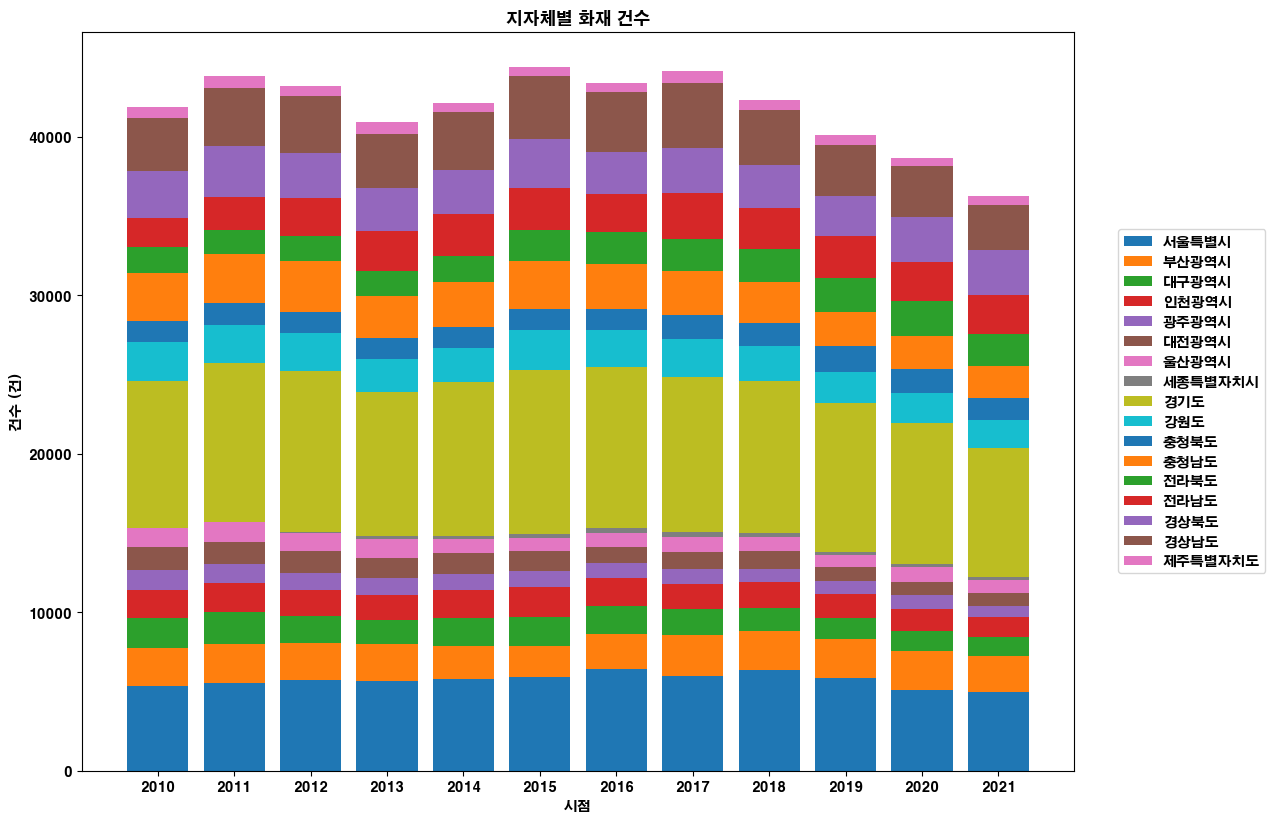

In [16]:
fig, axe = plt.subplots(figsize=(6.4*2, 4.8*2))
x = pd_data['시점'].unique()
axe.set(title='지자체별 화재 건수',xlabel='시점', xticks=x,
       ylabel='건수 (건)')
# axe.set_xlabel('시점')
# axe.set_ylabel('건수 (건)')
bottom = np.zeros(len(x))
for region in pd_data['행정구역별'].unique():
    filter1 = pd_data['행정구역별'] == region
    y = list(pd_data.loc[filter1, '건수 (건)']) 
#     print(bottom)
#     print(y)
    p = axe.bar(x,y, bottom=bottom)
    bottom += y
    
axe.legend(labels=pd_data['행정구역별'].unique(),loc = 'center right', bbox_to_anchor=(1.2,0.5, 0, 0))


C:\Users\ITPS\AppData\Local\Temp\ipykernel_11172\2670409037.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a = pd_data.groupby(['시점','행정구역별']).sum()


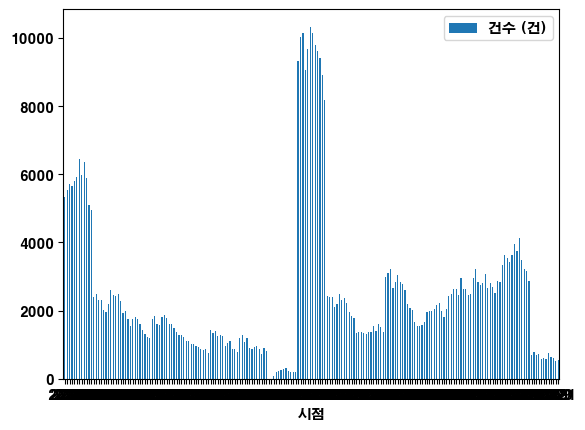

In [18]:
a = pd_data.groupby(['시점','행정구역별']).sum()
a
axe = pd_data.plot.bar(x = '시점', y = '건수 (건)', rot=0, stacked=True)

C:\Users\ITPS\AppData\Local\Temp\ipykernel_11172\2107620324.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  death_data = pd_data.pivot('행정구역별','시점','사망 (명)')


<AxesSubplot: xlabel='시점', ylabel='행정구역별'>

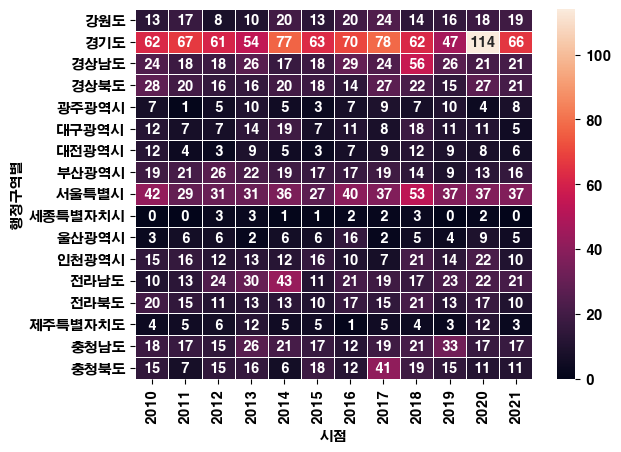

In [44]:
pd_data['사망 (명)'] = pd_data['사망 (명)'].astype(np.float64)
death_data = pd_data.pivot('행정구역별','시점','사망 (명)')
death_data
sns.heatmap(death_data,linewidth=0.5,annot=True, fmt='.0f')